<a href="https://colab.research.google.com/github/RenatoBatista/ReconhecimentoDePadroes/blob/main/aula01_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Carregar o conjunto de dados Iris
iris = load_iris()

# Selecionando 2 características
selected_labels = [0, 1]
selected_samples = np.isin(iris.target, selected_labels)
X = iris.data[selected_samples]
y = iris.target[selected_samples]
X = X[:, :2]

# conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

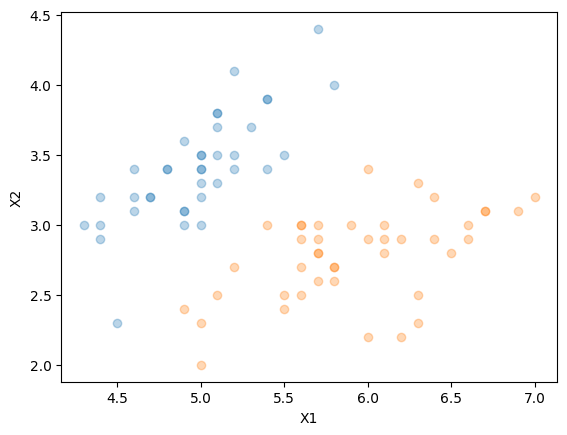

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plotaDatasetBidimensional(X, y):
    """
    Plota um dataset bidimensional.
    """
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotaDatasetBidimensional(X_train, y_train)

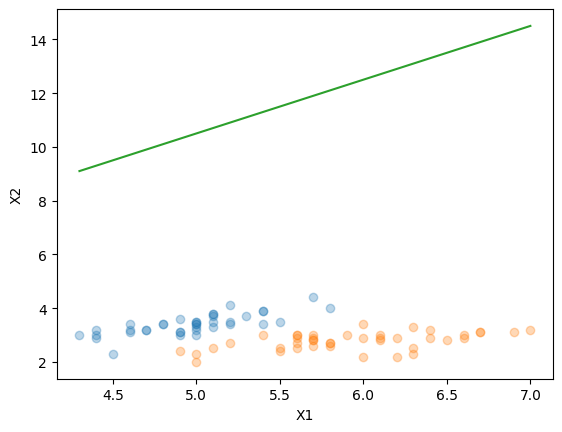

In [ ]:
def plotaHiperplanoDatasetBidimensional(X, y, vetor, intercept=0):
    """
    Plota um dataset bidimensional com um hiperplano definido por um
    vetor e o valor em que este vetor intercepta o eixo vertical.
    """
    x0min = min(X[:,0])
    x0max = max(X[:,0])
    xs = np.linspace(x0min, x0max, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
    plt.plot(xs,ys)
slop = [2, 1]
intercept = 0.5
plotaDatasetBidimensional(X_train, y_train)
vetor_hyperplano = np.array(slop) * np.array([1, -1])
plotaHiperplanoDatasetBidimensional(X_train, y_train, vetor_hyperplano, intercept)

In [ ]:
def sign(a):
  return (a >= 0) * 2 - 1

In [ ]:
def accuracy(yactual, ypred):
  return sum(yactual == ypred)/len(yactual)

0.5125
[ -70.70652461  327.11179453 -564.28377323]


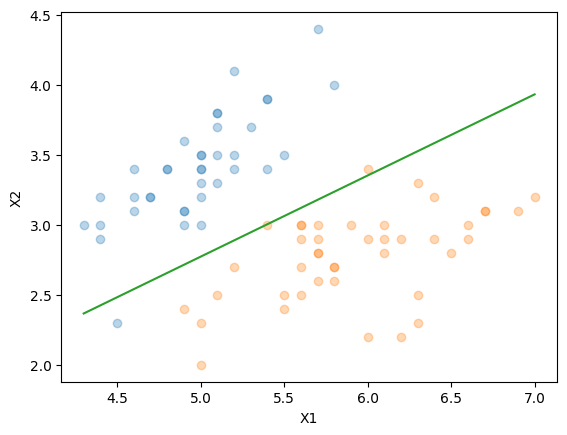

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
import random

def include_bias(X):
  bias = np.ones((X.shape[0], 1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=100):
     self.w = None
     self.activation = sign
     self.max_iter = max_iter

  def fit(self, X, y):
    Xb = include_bias(X)
    self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
    for _ in range(self.max_iter):
      ypred = self.predict(X)
      erros = y - ypred
      custo = sum(erros**2)
      if custo == 0:
        break
      self.w += Xb.T @ erros

  def predict(self, X):
    Xb = include_bias(X)
    a = Xb @ self.w
    ypred = self.activation(a)
    return ypred

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
print(accuracy(y_train, perceptron.predict(X_train)))
print(perceptron.w)
plotaDatasetBidimensional(X_train, y_train)
plotaHiperplanoDatasetBidimensional(X_train, y_train, perceptron.w[1:], perceptron.w[0])

Acurácia: 1.0


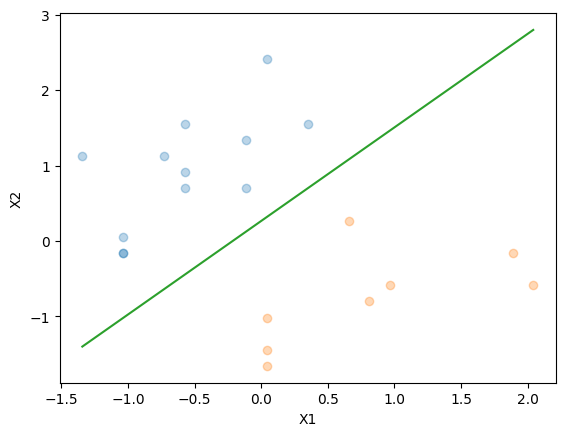

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Carregar o conjunto de dados Iris
iris = load_iris()

# Filtrar apenas os rótulos "0" (Setosa) e "1" (Versicolor)
selected_labels = [0, 1]
selected_samples = np.isin(iris.target, selected_labels)
X = iris.data[selected_samples]
y = iris.target[selected_samples]

# Selecionar apenas as características "Sepal Length" (comprimento da sépala) e "Sepal Width" (largura da sépala)
X = X[:, :2]

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar o modelo SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular a acurácia das previsões
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

# Obter os coeficientes da reta do separador
coef = model.coef_[0]
intercept = model.intercept_

plotaDatasetBidimensional(X_test, y_test)
plotaHiperplanoDatasetBidimensional(X_test, y_test, coef, intercept[0])